In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
# Creating the array of numbers as images
numbers = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # 0
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],  # 1
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],  # 2
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],  # 3
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # 4
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],  # 5
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],  # 6
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],  # 7
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # 8
])



In [ ]:
# Reshape the array to fit the K-means algorithm
X = numbers.reshape((-1, 1))


In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Print the labels and cluster centers
print("Cluster labels: ", kmeans.labels_)
print("Cluster centers: ", kmeans.cluster_centers_.flatten())


Cluster labels:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
Cluster centers:  [-3.33066907e-16  1.00000000e+00]


(-0.5, 9.5, 8.5, -0.5)

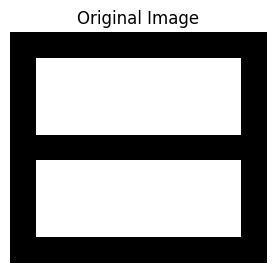

In [ ]:
# Visualization
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.imshow(numbers, cmap='gray')
plt.title("Original Image")
plt.axis('off')

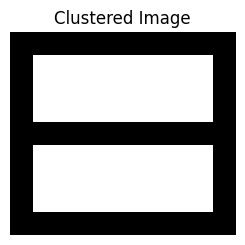

In [ ]:
plt.subplot(1, 2, 2)
clustered_image = kmeans.cluster_centers_[kmeans.labels_].reshape(numbers.shape)
plt.imshow(clustered_image, cmap='gray')
plt.title("Clustered Image")
plt.axis('off')

plt.show()



Lab 8 Assignment





Dated: Oct 18, 2023





Aim: To apply the K-means clustering algorithm on a data set of customer transactions and segment the customers into different groups based on their spending patterns.



Data set:The data set contains information about 200 customers who made purchases from an online retail store. The data set has five features: CustomerID, Gender, Age, Annual Income (in thousands of dollars), and Spending Score (a score between 1 and 100 that indicates how often and how much the customer spends). The data set can be downloaded from Customers- K means.csv

**Q1-Load the data set and perform some exploratory data analysis. Plot the distributions of the features and check for missing values or outliers.**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATASET/Customers- K means.csv", sep=",")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# checking missing values

missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


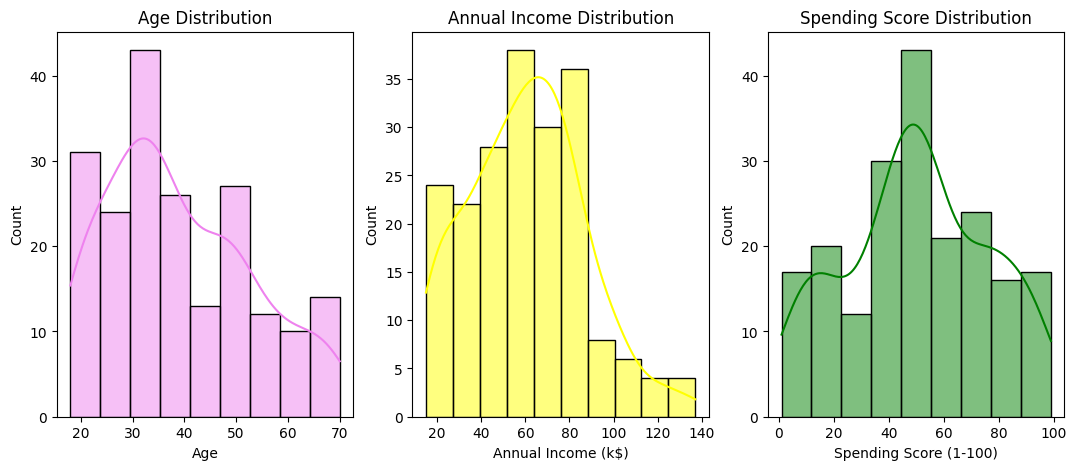

In [ ]:
plt.figure(figsize=(13, 5))

# Age distribution
plt.subplot(131)
sns.histplot(df['Age'], kde=True, color='violet')
plt.title('Age Distribution')

# Annual Income distribution
plt.subplot(132)
sns.histplot(df['Annual Income (k$)'], kde=True, color='yellow')
plt.title('Annual Income Distribution')

# Spending Score distribution
plt.subplot(133)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='green')
plt.title('Spending Score Distribution')

plt.show()

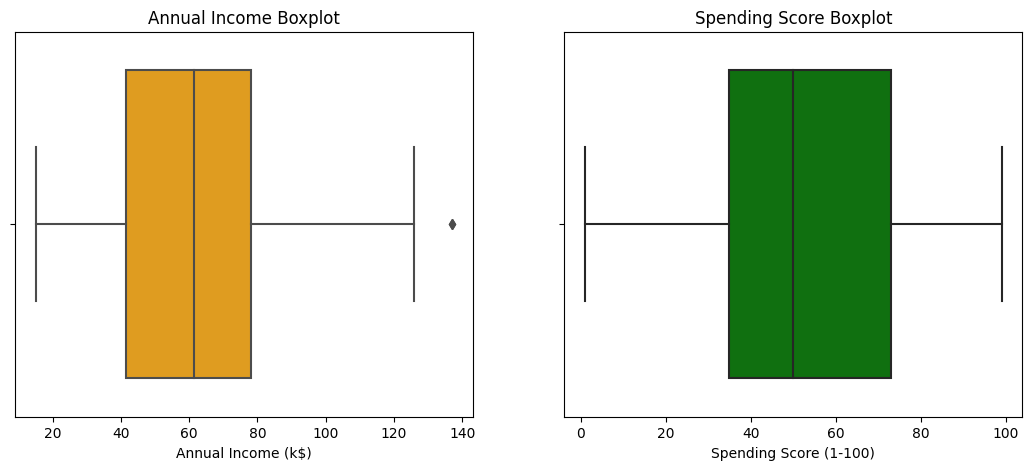

In [ ]:
# checking outliers

plt.figure(figsize=(13, 5))

# Box plot for Annual Income
plt.subplot(121)
sns.boxplot(x=df['Annual Income (k$)'], color='orange')
plt.title('Annual Income Boxplot')

# Box plot for Spending Score
plt.subplot(122)
sns.boxplot(x=df['Spending Score (1-100)'], color='green')
plt.title('Spending Score Boxplot')

plt.show()

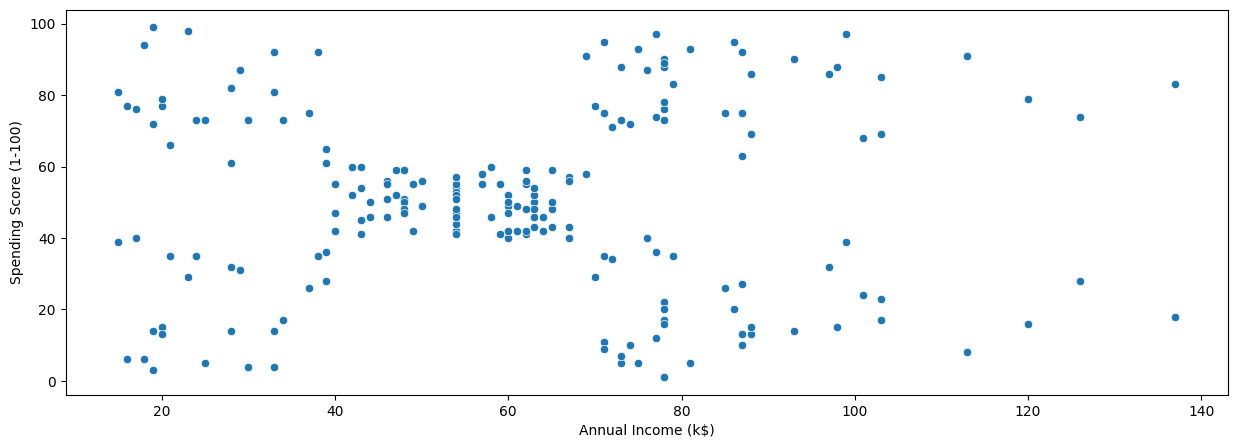

In [ ]:
# scatter plot

plt.figure(figsize=(15, 5))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.show()

#### Exercise 2

* Choose a value for K, the number of clusters. You can use following methods to determine the optimal value of K, such as the elbow method, the silhouette method, or your own intuition.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings

In [ ]:
# scaling data

scaler = MinMaxScaler()

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,0.387755
1,2,Male,0.057692,0.000000,0.816327
2,3,Female,0.038462,0.008197,0.051020
3,4,Female,0.096154,0.008197,0.775510
4,5,Female,0.250000,0.016393,0.397959


In [ ]:
# elbow method to find k

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

vp = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    vp.append(km.inertia_)

warnings.resetwarnings()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vp

[23.04072032603991,
 13.993505283127973,
 9.058985215159453,
 6.110312266413656,
 3.5831179059525606,
 3.1004341489924965,
 2.624103948396722,
 2.235753860216768,
 1.9960459210444708]

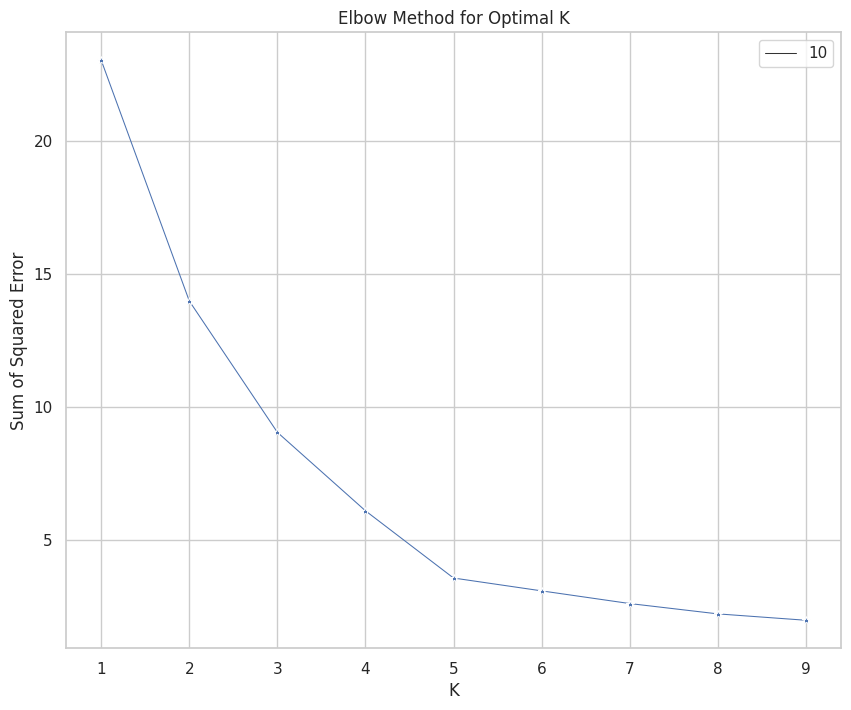

In [ ]:
plt.figure(figsize=(10, 8))

sns.set(style='whitegrid')
sns.lineplot(x=k_rng, y=vp, marker='*', color='b',)

plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Method for Optimal K')

plt.show()

In [ ]:
# silhouette method

from sklearn.metrics import silhouette_score

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
    score = silhouette_score(df[['Annual Income (k$)','Spending Score (1-100)']], labels)
    silhouette_scores.append(score)

warnings.resetwarnings()

In [ ]:
silhouette_scores

[0.33340205479521,
 0.4514909309424474,
 0.49620078745146784,
 0.5602436353739457,
 0.535817696916733,
 0.5178198763321877,
 0.43074523601514214,
 0.44112594977730835,
 0.44646697436199156]

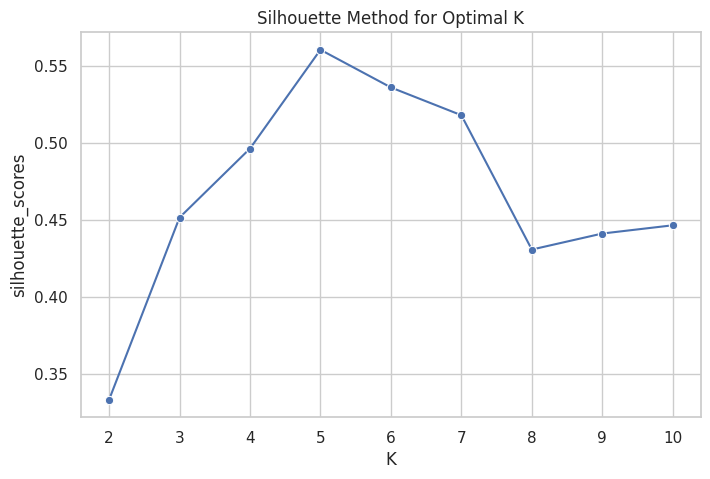

In [ ]:
plt.figure(figsize=(8, 5))

sns.set(style='whitegrid')
sns.lineplot(x=range(2, 11), y=silhouette_scores, marker='o', color='b')

plt.xlabel('K')
plt.ylabel('silhouette_scores')
plt.title('Silhouette Method for Optimal K')

plt.show()

#### Exercise 3

* Implement the K-means clustering algorithm using Python. You can use any library or framework of your choice, such as NumPy, SciPy, scikit-learn, etc.

In [ ]:
# according to elbow method and silhouette method the cluster value of k = 5 is best , so taking k = 5

km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,0.000000,0.387755,4
1,2,Male,0.057692,0.000000,0.816327,2
2,3,Female,0.038462,0.008197,0.051020,4
3,4,Female,0.096154,0.008197,0.775510,2
4,5,Female,0.250000,0.016393,0.397959,4


#### Exercise 4

* Apply the K-means algorithm on the data set and assign each customer to a cluster. Plot the clusters and the cluster centroids on a scatter plot. You can choose any two features to plot, such as Annual Income and Spending Score, or Age and Gender.

In [ ]:
# clusters center point

km.cluster_centers_

array([[0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894],
       [0.58638083, 0.82783883],
       [0.09265859, 0.20319432]])

Text(0.5, 1.0, 'K-means Clustering with K=5')

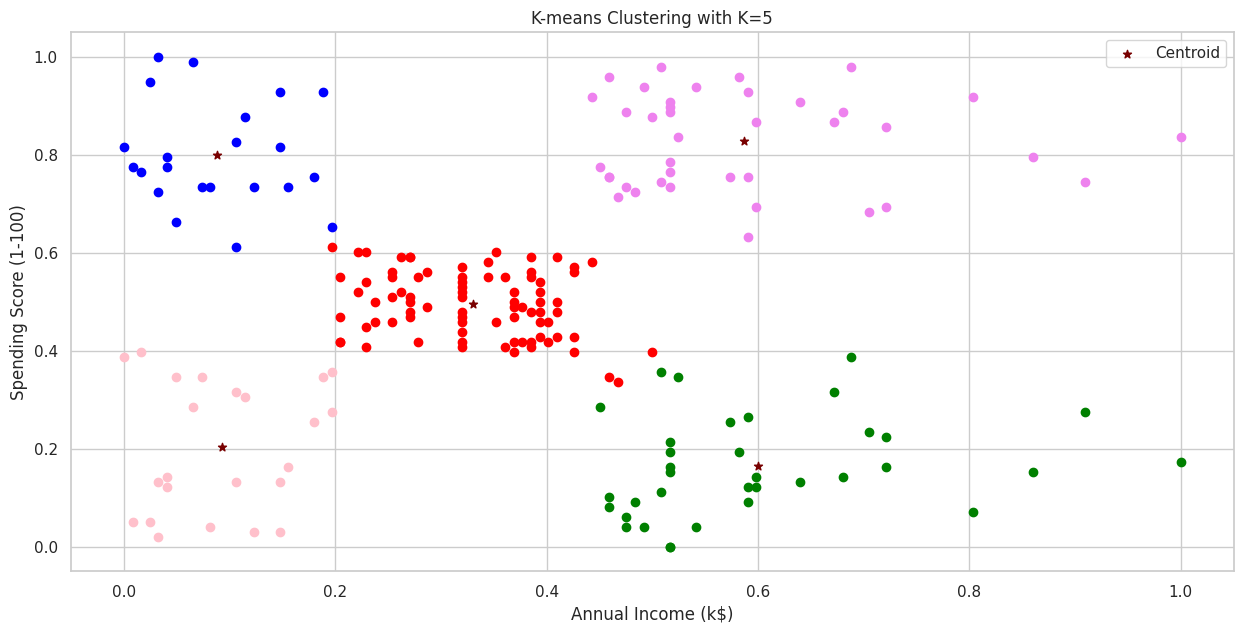

In [ ]:
plt.figure(figsize=(15, 7))

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='red')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='green')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='blue')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='violet')
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='pink')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='#780000', marker='*', label='Centroid')
plt.legend()
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering with K=5')

#### Exercise 5

* Interpret the results and describe the characteristics of each cluster. What are the similarities and differences among the customers in each cluster? How can this information be useful for marketing or business strategies?

#### ans :

* Cluster 1 (blue color) :  Low Income, High Spending : Customers in this cluster have low annual income but spend a lot.
* Business Strategies: Offer budget-friendly financing options or policies.



* Cluster 2 (Red color) : High Income, Hign Spending : Customers in this cluster have Hign annual income and also spend a lot. They are genarally big spenders
* Business Strategies: Offer premium products ans services , also provide luxury experiences.



* Cluster 3 (green color) : Average Income, Average Spending : Customers in this cluster moderate income and average spending, These customers are the middle-class and may be budget-conscious.
* Business Strategies: Offer promotions, discounts, and budget-friendly products to suit their budget.


* Cluster 4 (pink color) : Low Income, Low Spending : Customers in this cluster have low annual income and also spend less according to need. They may be very budget-conscious or have limited spending options.
* Business Strategies: Focus on value-oriented products, discounts, or policies.


* Cluster 5 (violet color) : Hign Income, Low Spending : Customers in this cluster have a high annual income but tend to spend relatively less. They might be considered "Savers".
* Business Strategies: Target them with investment opportunities, savings plans, or exclusive high-end products.